<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

In [91]:
import numpy as np
import pandas as pd
import scipy
from matplotlib import pylab, gridspec, pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')


Задание 1
## Простейший kNN
Вам выданы координаты точек и метки классов. Нужно для новой точки предсказать метку класса.

In [92]:
file = open('reds.txt', 'r')
#reds = np.array([])
reds = []
for i in file:
    x = i.split(',')
#    print(x[0],x[1].strip())
    reds.append([x[0],x[1].strip()])


In [93]:
# выгрузите данные в массивы reds и blues из файлов reds.txt и blues.txt
file = open('reds.txt', 'r')
reds = []
for i in file:
    x = i.split(',')
    reds.append([int(x[0]),float(x[1].strip())])
    
file2 = open('blues.txt', 'r')
blues = []
for i in file2:
    x = i.split(',')
    blues.append([int(x[0]),float(x[1].strip())])

a = [x for x in range(800)]
red_pairs=[[i,reds[i]] for i in range(800)]
blue_pairs=[[i,blues[i]] for i in range(800)]
reds = np.array(reds)[:,1]
blues = np.array(blues)[:,1]


Постройте на одном графике точки `reds`и `blues` при помощи `plt.scatter`

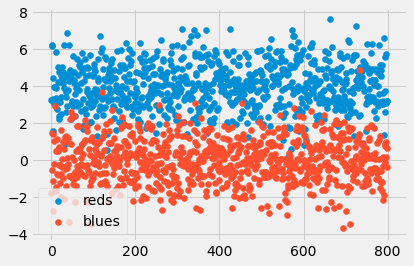

In [94]:
plt.scatter(a, reds, label='reds')
plt.scatter(a, blues, label='blues')
plt.legend()
plt.show()

 Напишем функцию, которая выбирает для заданного **k** и координат точки наиболее подходящий класс по методу k ближайших соседей

In [95]:
def guess_class(x,y,k):
    '''
        Функция отрисовки окрестности точки (x,y) и функция поиска расстояния между точками b,c на плоскости
    '''
    b = (x, y)
    def draw_points(x,y):
        plt.figure(figsize=(5,5))
        plt.grid(ls='--')
        plt.scatter(a,reds,label='reds', color='r')
        plt.scatter(a,blues,label='blues', color='b')
        plt.scatter(x,y)
        plt.xlim(x-4, x+4)
        plt.ylim(y-4, y+4)
    draw_points(x,y)
    
    def distance_2d(b,c):
        #Функция подсчета расстояния между двумя точками. Здесь b и с -- координаты точек на плоскости.
        return ((b[0]-c[0])**2+ (b[1]-c[1])**2)**0.5
        
    def calculate_k_distances(class_points):
        '''
        Функция подсчета расстояния до k ближайших точек класса class_points
        '''
        a = []
        for i in class_points:
            a.append(distance_2d(b, i[1]))
        return sorted(a)[:k]
             
    b = np.array(calculate_k_distances(blue_pairs)) # расстояния до ближайших k соседей класса blue
    r = np.array(calculate_k_distances(red_pairs)) # расстояния до ближайших k соседей класса red

    
     # вам необходимо проверить расстояния до ближайших k точек и посмотреть, какой класс встречается чаще всего. 
    if np.median(b) <= np.median(r):#Находи медианы ближайщих точек и сравниваем.Если среднее значение меньше, то это искомый класс
        print("blues")
    else:
        print("reds")

reds


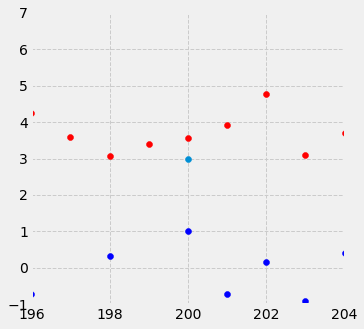

In [96]:
guess_class(200,3,3)